<a href="https://colab.research.google.com/github/ishaijazzzz/python-assignments/blob/main/Week_14_Ethics_%26_Explainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap scikit-learn pandas matplotlib

In [2]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create dummy dataset
X, y = make_classification(n_samples=100, n_features=5, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 6)])
df['target'] = y

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Display first few rows
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.430668,0.672873,-0.724280,-0.539630,-0.651600,0
1,0.211646,-0.843897,0.534794,0.825848,0.681953,1
2,1.092675,0.409106,1.100096,-0.942751,-0.981509,0
3,1.519901,-0.773361,1.998053,0.155132,-0.385314,0
4,-0.453901,-2.183473,0.244724,2.591239,-0.484234,1


In [3]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)  # works with tree-based models like Random Forest
shap_values = explainer.shap_values(X_test)  # SHAP values for test set


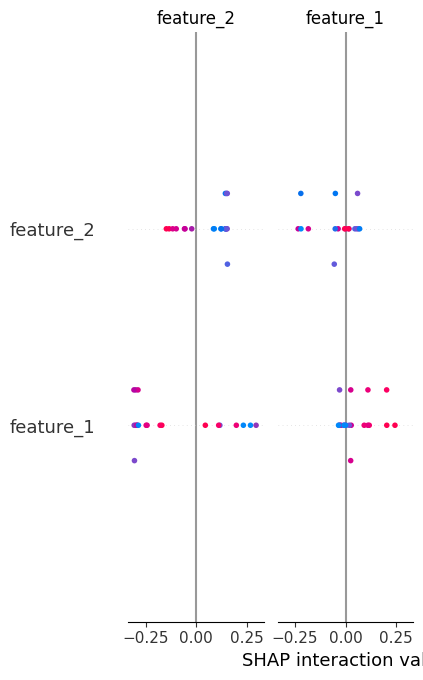

In [4]:
import matplotlib.pyplot as plt

# Plot summary plot (global importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")
